In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import datetime
from dateutil.relativedelta import relativedelta # 6개월 전 날짜 구하기

import nltk # 자연어 처리를 위한 파이썬 패키지
from nltk.tokenize import RegexpTokenizer # 토큰화 시 기호도 한 번에 제거, 현재 오류로 사용 안함
from nltk import Text # 단어 빈도 시각화
from collections import Counter # 단어 빈도 데이터프레임화
from wordcloud import WordCloud, STOPWORDS # 워드클라우드 시각화, 불용어 처리
import re # 불용어 처리 시 사용하는 정규표현식

In [2]:
nltk.download('punkt') # 토큰화 작업을 위해 필요한 파일

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
nltk.download('stopwords') # 불용어 처리를 위해 다운로드

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
nltk.download('averaged_perceptron_tagger') # pos_tag 작업을 위해 다운

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# 6개월 데이터

In [6]:
volvo = pd.read_csv('volvo_5years.csv')
volvo.head(3)

,뉴스구분,날짜,제목,요약,본문
0,By Press information,6/14/2023,VOLVO CONSTRUCTION EQUIPMENT MOVES HEADQUARTER...,Volvo Construction Equipment (Volvo CE) has to...,Eskilstuna is already a large cross functional...
1,By Press information,5/17/2023,VOLVO CONSTRUCTION EQUIPMENT WALKS THE TALK WI...,Volvo Construction Equipment (Volvo CE) brough...,By bringing commercial electric solutions – as...
2,By Press information,4/20/2023,STRONG START TO 2023 FOR VOLVO CONSTRUCTION EQ...,Robust earnings and continued demand in Europe...,"In Q1, 2023, Volvo CE has secured good profita..."


In [7]:
current = datetime.datetime.now().date()
print(current)

2023-06-19


In [9]:
six_month_ago = current + relativedelta(months = -6)
print(six_month_ago)

2022-12-19


In [10]:
volvo['날짜'] = pd.to_datetime(volvo['날짜'])
volvo.head(3)

,뉴스구분,날짜,제목,요약,본문
0,By Press information,2023-06-14,VOLVO CONSTRUCTION EQUIPMENT MOVES HEADQUARTER...,Volvo Construction Equipment (Volvo CE) has to...,Eskilstuna is already a large cross functional...
1,By Press information,2023-05-17,VOLVO CONSTRUCTION EQUIPMENT WALKS THE TALK WI...,Volvo Construction Equipment (Volvo CE) brough...,By bringing commercial electric solutions – as...
2,By Press information,2023-04-20,STRONG START TO 2023 FOR VOLVO CONSTRUCTION EQ...,Robust earnings and continued demand in Europe...,"In Q1, 2023, Volvo CE has secured good profita..."


In [11]:
# 6개월 데이터
six_month_volvo = volvo[(volvo['날짜'] > '2022-12-19') & (volvo['날짜'] <= '2023-06-19')]
six_month_volvo.tail()

,뉴스구분,날짜,제목,요약,본문
18,By Press information,2023-01-26,VOLVO CONSTRUCTION EQUIPMENT INCREASES SALES A...,Volvo Construction Equipment (Volvo CE) has ac...,All global markets have enjoyed an increase in...
19,By Press information,2023-01-23,VOLVO CONSTRUCTION EQUIPMENT LEADS INDUSTRY CH...,As part of its ambition towards industry trans...,The Arvika factory in Sweden specializes in th...
20,By Press information,2023-01-18,VOLVO CE TO SHOWCASE SOLUTIONS FOR A CHANGING ...,Attendees will have the opportunity to test dr...,Volvo Construction Equipment (Volvo CE) is bui...
21,By Press information,2023-01-18,VOLVO CE INTRODUCES FIRST ELECTRIC MACHINE FOR...,Volvo Construction Equipment (Volvo CE) is unv...,The DD25 Electric will be unveiled at CONEXPO ...
22,By Press information,2023-01-11,VOLVO CE INTRODUCES COLLISION MITIGATION SYSTE...,"Delivering on its vision for zero accidents, V...",The first system of its kind from any original...


# 5개년 데이터

In [12]:
five_year_volvo = volvo[(volvo['날짜'] > '2019-01-01') & (volvo['날짜'] <= '2023-06-19')]
five_year_volvo.tail()

,뉴스구분,날짜,제목,요약,본문
140,By Press Information,2019-03-01,VOLVO CE ACQUIRES SPECIAL APPLICATIONS FIRM CEDE,Agreement signed to acquire low-volume Swedish...,Volvo Construction Equipment (Volvo CE) has an...
141,By Press Information,2019-02-21,VOLVO CE PARTNERS WITH NATIONAL GEOGRAPHIC ON ...,Volvo Construction Equipment (Volvo CE) has jo...,Through a new collaboration that aligns with b...
142,By Press Information,2019-02-01,VOLVO LOOKS TO THE ELECTRIC FUTURE AT BAUMA 2019,Visitors to this year’s bauma 2019 exhibition ...,"Demonstrating the breadth of the Volvo Group, ..."
143,By Press Information,2019-01-30,VOLVO CONSTRUCTION EQUIPMENT SEES SALES UP 27%...,Supported by a fourth quarter that saw sales u...,Volvo Construction Equipment (Volvo CE) ended ...
144,By Press Information,2019-01-16,VOLVO CE GOES ELECTRIC ON SMALLER MACHINES,"In an industry-first move, Volvo Construction ...",In a pioneering commitment to future technolog...


# 5개년
## 5개년 기사 제목

In [13]:
# 데이터프레임 내 '제목' 컬럼을 리스트화
volvo_title = five_year_volvo["제목"].values.tolist()
volvo_title[:5]

['VOLVO CONSTRUCTION EQUIPMENT MOVES HEADQUARTERS TO ESKILSTUNA, SWEDEN',
 'VOLVO CONSTRUCTION EQUIPMENT WALKS THE TALK WITH SUSTAINABILITY DEMONSTRATION FOR TOP US POLICYMAKERS',
 'STRONG START TO 2023 FOR VOLVO CONSTRUCTION EQUIPMENT',
 'KAMEL SID APPOINTED HEAD OF OPERATIONS AT VOLVO CONSTRUCTION EQUIPMENT',
 'VOLVO CONSTRUCTION EQUIPMENT HIGHLIGHTS COMPLETE SOLUTIONS FOR A CHANGING INDUSTRY WITH IMMERSIVE EXPERIENCE AT CONEXPO-CON/AGG']

In [14]:
# 문장을 토큰화(문장을 단어로 끊어냄)
volvo_title_token = []
for i in volvo_title:
    # word_tokenize(i) 시 출력되는 형태 ex) ',' 포함 출력
    volvo_token = nltk.word_tokenize(i)
    # 아래 코드는 오류 발생
    # retokenize = nltk.RegexpTokenizer('[\w]+')
    print(nltk.word_tokenize(i))
    volvo_title_token.append(volvo_token)

['VOLVO', 'CONSTRUCTION', 'EQUIPMENT', 'MOVES', 'HEADQUARTERS', 'TO', 'ESKILSTUNA', ',', 'SWEDEN']
['VOLVO', 'CONSTRUCTION', 'EQUIPMENT', 'WALKS', 'THE', 'TALK', 'WITH', 'SUSTAINABILITY', 'DEMONSTRATION', 'FOR', 'TOP', 'US', 'POLICYMAKERS']
['STRONG', 'START', 'TO', '2023', 'FOR', 'VOLVO', 'CONSTRUCTION', 'EQUIPMENT']
['KAMEL', 'SID', 'APPOINTED', 'HEAD', 'OF', 'OPERATIONS', 'AT', 'VOLVO', 'CONSTRUCTION', 'EQUIPMENT']
['VOLVO', 'CONSTRUCTION', 'EQUIPMENT', 'HIGHLIGHTS', 'COMPLETE', 'SOLUTIONS', 'FOR', 'A', 'CHANGING', 'INDUSTRY', 'WITH', 'IMMERSIVE', 'EXPERIENCE', 'AT', 'CONEXPO-CON/AGG']
['VOLVO', 'CONSTRUCTION', 'EQUIPMENT', 'HELPS', 'CUSTOMERS', 'SEE', 'BIGGER', 'PICTURE', 'WITH', 'CONNECTED', 'MAP', 'IN', 'NORTH', 'AMERICA']
['VOLVO', 'CE', 'DELIVERS', 'NORTH', 'AMERICA', '’', 'S', 'FIRST', 'MACHINE', 'MADE', 'USING', 'FOSSIL-FREE', 'STEEL']
['VOLVO', 'CONSTRUCTION', 'EQUIPMENT', 'OPENS', 'PRE-ORDER', 'TOOL', 'IN', 'NORTH', 'AMERICA', 'FOR', 'NEW', 'DD25', 'ELECTRIC', 'ASPHALT', 'C

In [21]:
# 비교해서 보기
title_df = five_year_volvo[['날짜', '제목']].copy()
title_df['토큰'] = volvo_title_token
title_df.head()

,날짜,제목,토큰
0,2023-06-14,VOLVO CONSTRUCTION EQUIPMENT MOVES HEADQUARTER...,"[VOLVO, CONSTRUCTION, EQUIPMENT, MOVES, HEADQU..."
1,2023-05-17,VOLVO CONSTRUCTION EQUIPMENT WALKS THE TALK WI...,"[VOLVO, CONSTRUCTION, EQUIPMENT, WALKS, THE, T..."
2,2023-04-20,STRONG START TO 2023 FOR VOLVO CONSTRUCTION EQ...,"[STRONG, START, TO, 2023, FOR, VOLVO, CONSTRUC..."
3,2023-03-23,KAMEL SID APPOINTED HEAD OF OPERATIONS AT VOLV...,"[KAMEL, SID, APPOINTED, HEAD, OF, OPERATIONS, ..."
4,2023-03-15,VOLVO CONSTRUCTION EQUIPMENT HIGHLIGHTS COMPLE...,"[VOLVO, CONSTRUCTION, EQUIPMENT, HIGHLIGHTS, C..."


In [22]:
# 각 리스트들을 하나의 리스트로 합침.
title_token_all = []
for sublist in volvo_title_token:
    title_token_all.extend(sublist)

In [23]:
title_token_all[:10]

['VOLVO',
 'CONSTRUCTION',
 'EQUIPMENT',
 'MOVES',
 'HEADQUARTERS',
 'TO',
 'ESKILSTUNA',
 ',',
 'SWEDEN',
 'VOLVO']

### 불용어 처리 전 단어 빈도 시각화

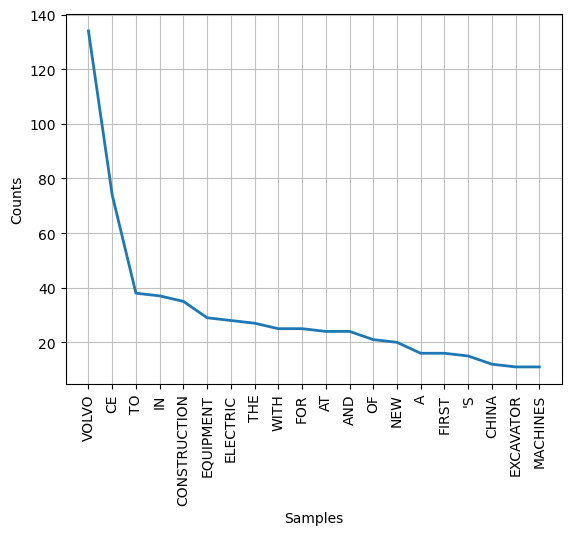

In [24]:
text = Text(title_token_all)
text.plot(20)
plt.show()

In [71]:
# Counter() 를 사용하여 단어 빈도가 많은 단어순으로 데이터프레임화
c = Counter(title_token_all)
title_df = pd.DataFrame(c.most_common(), columns=['word', 'count']);
title_df[:20]

,word,count
0,VOLVO,134
1,CE,74
2,TO,38
3,IN,37
4,CONSTRUCTION,35
5,EQUIPMENT,29
6,ELECTRIC,28
7,THE,27
8,WITH,25
9,FOR,25


### 불용어 처리

In [26]:
# 영어 불용어 단어 리스트를 불러와 변수에 저장
stopwords = nltk.corpus.stopwords.words('english')

In [27]:
stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

In [28]:
# 지영님 불용어 처리 단어들 불러옴
a = pd.read_csv('stop_words.csv')
a['0'] # '0'이란 데이터프레임 컬럼에 불용어 단어들이 들어있음

0           a
1         but
2      during
3        hows
4        it's
        ...  
234      2023
235      2022
236      2022
237         –
238       NaN
Name: 0, Length: 239, dtype: object

In [29]:
# a의 2차원 리스트를 1차원 리스트로 변환
# 그렇지 않으면 기존의 stopwords 변수와 합칠 때 형식이 달라 오류가 발생
a_list=[]
for i in a['0']:
    a_list.append(i)

In [30]:
a_list[:5]

['a', 'but', 'during', 'hows', "it's"]

In [31]:
# nltk의 기존 불용어에 지영님 불용어 결합
stopwords = stopwords+a_list

In [58]:
# 불용어 단어 추가
b = ['volvo', 'ce', 'construction', 'equipment', ' ', '', 's', 'machine', 'machines']
stopwords = stopwords+b

In [73]:
# nltk의 불용어는 모두 소문자 형태이기 때문에, 뉴스 제목에서 토큰화한 것들을 소문자 처리
title_lower=[]
for word in title_token_all:
    title_lower.append(word.lower())

In [37]:
title_lower[:5]

['volvo', 'construction', 'equipment', 'moves', 'headquarters']

In [74]:
# 정규 표현식 활용, 기호 제거
filtered_title = [re.sub(r'[^\s\w]', '', word) for word in title_lower if word not in stopwords]

### 불용어 처리 후 단어 빈도 시각화

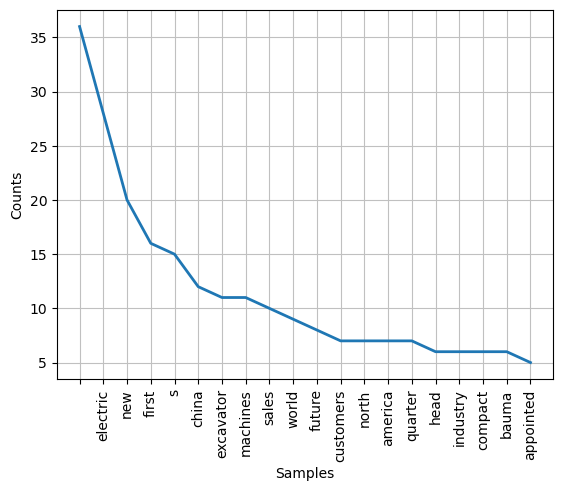

In [44]:
text = Text(filtered_title)

text.plot(20)
plt.show()

In [75]:
c = Counter(filtered_title)
title_df = pd.DataFrame(c.most_common(), columns=['word', 'count']);
title_df[:20]

,word,count
0,,36
1,electric,28
2,new,20
3,first,16
4,s,15
5,china,12
6,excavator,11
7,sales,10
8,world,9
9,future,8


### 소문자 워드클라우드(volvo, ce 등 단어 존재)

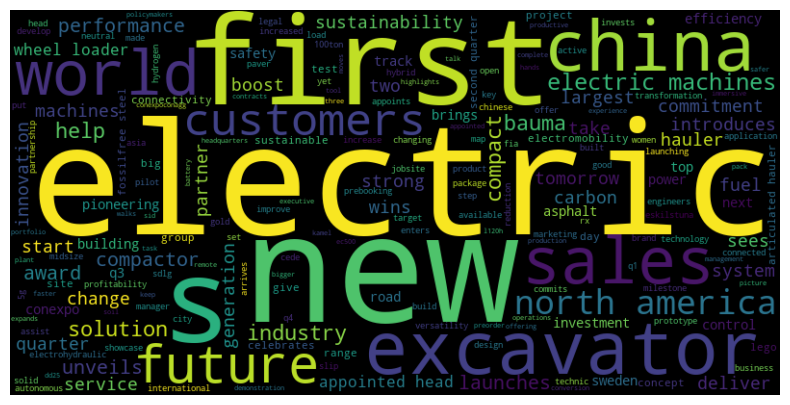

In [46]:
# 리스트에 담긴 단어들을 공백으로 연결하여 문자열로 변환
text = ' '.join(filtered_title)

# WordCloud 객체 생성
wordcloud = WordCloud(width=800, height=400).generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 대문자->소문자 변경 하지 않고
- 소문자로 변형하는 것이 불용어 처리가 더 깔끔하게 되는 것 같아보임

In [47]:
# 임의로 정한 불용어 추가
b = ['VOLVO', 'CE', 'CONSTRUCTION', 'EQUIPMENT', 'S', ' ', '']

In [48]:
stopwords = stopwords+b
filtered_title = [re.sub(r'[^\s\w]', ' ', word) for word in title_token_all if word not in stopwords]

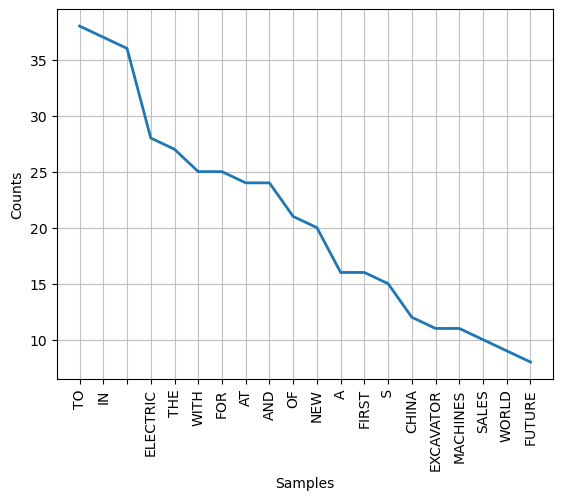

In [49]:
text = Text(filtered_title)

text.plot(20)
plt.show()

In [50]:
c = Counter(filtered_title)
word_df = pd.DataFrame(c.most_common(), columns=['word', 'count']);
word_df

,word,count
0,TO,38
1,IN,37
2,,36
3,ELECTRIC,28
4,THE,27
...,...,...
573,LOOKS,1
574,27,1
575,2018,1
576,GOES,1


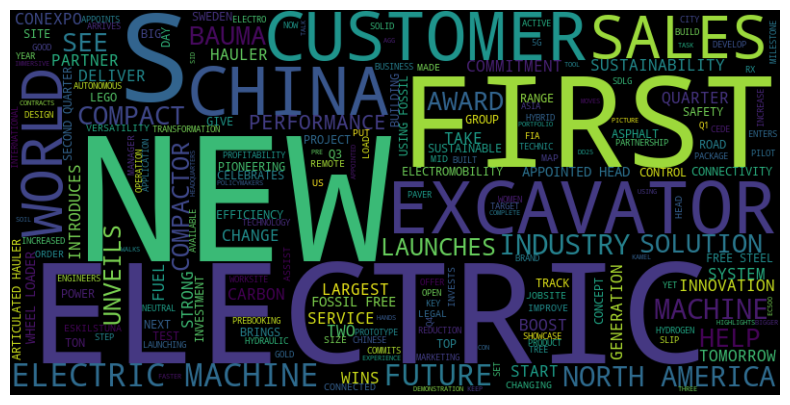

In [51]:
# 리스트에 담긴 단어들을 공백으로 연결하여 문자열로 변환
text = ' '.join(filtered_title)

# WordCloud 객체 생성
wordcloud = WordCloud(width=800, height=400).generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 5개년 기사 요약

In [60]:
# 데이터프레임 내 '요약' 컬럼을 리스트화
volvo_summary = five_year_volvo["요약"].values.tolist()

# 문장을 토큰화(문장을 단어로 끊어냄)
volvo_summary_token = []
for i in volvo_summary:
    # word_tokenize(i) 시 출력되는 형태 ex) ',' 포함 출력
    volvo_token = nltk.word_tokenize(i)
    volvo_summary_token.append(volvo_token)

# 각 리스트들을 하나의 리스트로 합침.
summary_token_all = []
for sublist in volvo_summary_token:
    summary_token_all.extend(sublist)
    
# 불용어처리
# nltk의 불용어는 모두 소문자 형태이기 때문에, 뉴스 제목에서 토큰화한 것들을 소문자 처리
summary_lower=[]
for word in summary_token_all:
    summary_lower.append(word.lower())

# 정규 표현식 활용, 기호 제거
filtered_summary = [re.sub(r'[^\s\w]', '', word) for word in summary_lower if word not in stopwords]

In [61]:
# 비교해서 보기
summary_df = five_year_volvo[['날짜', '요약']].copy()
summary_df['토큰'] = volvo_summary_token
summary_df.head()

,날짜,요약,토큰
0,2023-06-14,Volvo Construction Equipment (Volvo CE) has to...,"[Volvo, Construction, Equipment, (, Volvo, CE,..."
1,2023-05-17,Volvo Construction Equipment (Volvo CE) brough...,"[Volvo, Construction, Equipment, (, Volvo, CE,..."
2,2023-04-20,Robust earnings and continued demand in Europe...,"[Robust, earnings, and, continued, demand, in,..."
3,2023-03-23,Volvo Construction Equipment (Volvo CE) has an...,"[Volvo, Construction, Equipment, (, Volvo, CE,..."
4,2023-03-15,Volvo Construction Equipment (Volvo CE) showca...,"[Volvo, Construction, Equipment, (, Volvo, CE,..."


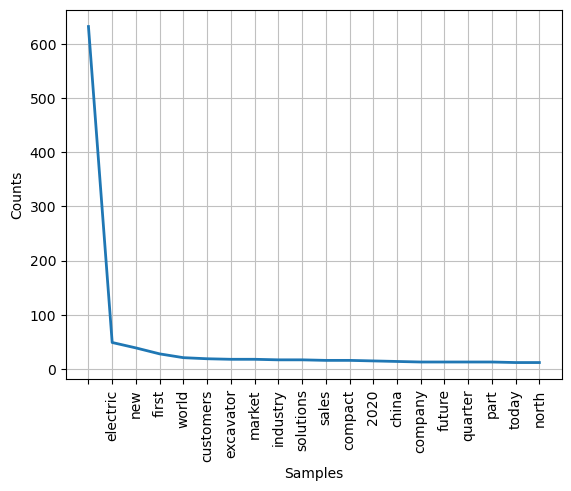

In [62]:
# 불용어 처리 후 단어빈도 시각화
text = Text(filtered_summary)

text.plot(20)
plt.show()

In [76]:
c = Counter(filtered_summary)
summary_df = pd.DataFrame(c.most_common(), columns=['word', 'count']);
summary_df[:20]

,word,count
0,,632
1,electric,49
2,new,39
3,first,28
4,world,21
5,customers,19
6,excavator,18
7,market,18
8,industry,17
9,solutions,17


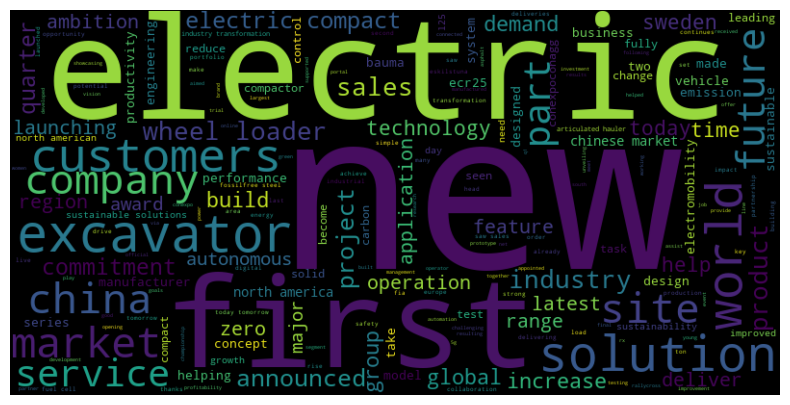

In [64]:
# 리스트에 담긴 단어들을 공백으로 연결하여 문자열로 변환
text = ' '.join(filtered_summary)

# WordCloud 객체 생성
wordcloud = WordCloud(width=800, height=400).generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 5개년 기사 본문

In [65]:
# 데이터프레임 내 '본문' 컬럼을 리스트화
volvo_content = volvo["본문"].values.tolist()

# 문장을 토큰화(문장을 단어로 끊어냄)
volvo_content_token = []
for i in volvo_content:
    # word_tokenize(i) 시 출력되는 형태 ex) ',' 포함 출력
    volvo_token = nltk.word_tokenize(i)
    volvo_content_token.append(volvo_token)

# 각 리스트들을 하나의 리스트로 합침.
content_token_all = []
for sublist in volvo_content_token:
    content_token_all.extend(sublist)
    
# 불용어처리
# nltk의 불용어는 모두 소문자 형태이기 때문에, 뉴스 제목에서 토큰화한 것들을 소문자 처리
content_lower=[]
for word in content_token_all:
    content_lower.append(word.lower())

# 정규 표현식 활용, 기호 제거
filtered_content = [re.sub(r'[^\s\w]', '', word) for word in content_lower if word not in stopwords]

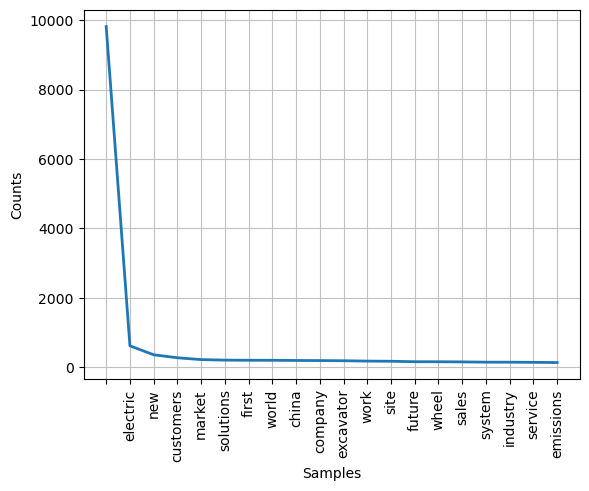

In [66]:
text = Text(filtered_content)

text.plot(20)
plt.show()

In [77]:
c = Counter(filtered_content)
content_df = pd.DataFrame(c.most_common(), columns=['word', 'count']);
content_df[:20]

,word,count
0,,9821
1,electric,614
2,new,356
3,customers,270
4,market,217
5,solutions,202
6,first,198
7,world,197
8,china,192
9,company,189


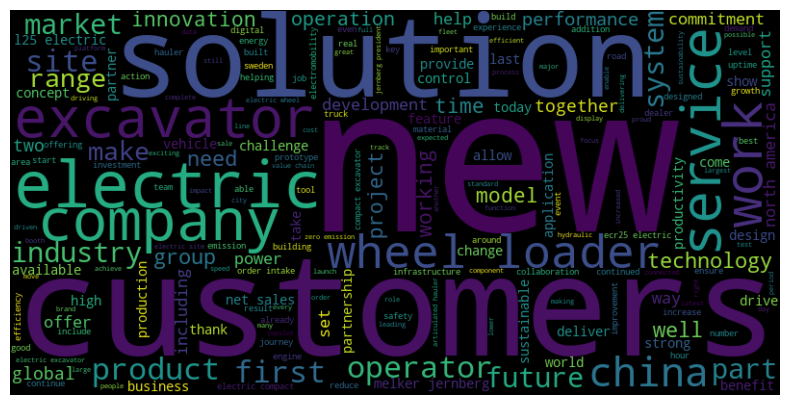

In [69]:
# 리스트에 담긴 단어들을 공백으로 연결하여 문자열로 변환
text = ' '.join(filtered_content)

# WordCloud 객체 생성
wordcloud = WordCloud(width=800, height=400).generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()